## 6332032921 Pisitpong Chongpipattanakul

# Hello Soft Clustering (GMM)

### T1. Using 3 mixtures, initialize your Gaussian with means (3,3), (2,2), and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mix- ture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration. (You may do the calculations by hand or write code to do so)



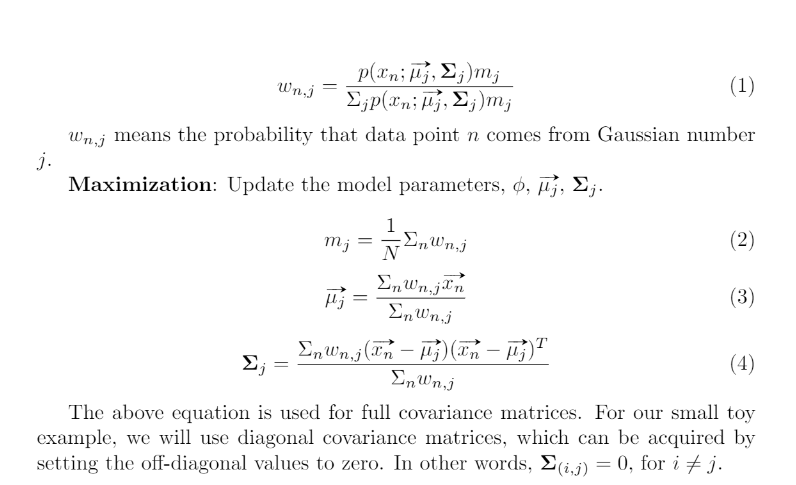

## TODO: Complete functions below including
- Fill relevant parameters in each function.
- Implement computation and return values.

These functions will be used in T1-4.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Hint: You can use this function to get gaussian distribution.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html
from scipy.stats import multivariate_normal

In [3]:
class GMM:
    def __init__(self, mixture_weight, mean_params, cov_params):
        """
        Initialize GMM.
        """
        # Copy construction values.
        self.mixture_weight = mixture_weight
        self.mean_params = mean_params
        self.cov_params = cov_params

        # Initiailize iteration.
        self.n_iter = 0

    def estimation_step(self, data):
        """
        TODO: Perform estimation step. Then, return w_{n,j} in eq. 1)
        """

        # INSERT CODE HERE
        num_mixture = self.mixture_weight.shape[0]
        w = []

        for point in data:
          all_prob = 0.0
          w_i = []

          for i in range(num_mixture):
            dist = multivariate_normal(mean=self.mean_params[i], cov=self.cov_params[i])
            prob = dist.pdf(point) * self.mixture_weight[i]

            all_prob += prob
            w_i.append(prob)

          for i in range(num_mixture):
            w_i[i] /= all_prob

          w.append(w_i)
        return np.array(w)

    def maximization_step(self, data, w):
        """
        TODO: Perform maximization step.
            (Update parameters in this GMM model.)
        """
        # INSERT CODE HERE
        num_mixture = self.mixture_weight.shape[0]
        num_data = data.shape[0]

        new_mixture_weight = np.copy(self.mixture_weight)
        new_mean_params = np.copy(self.mean_params)
        new_cov_params = np.copy(self.cov_params)

        for i in range(num_mixture):
          all_prob = np.sum(w[:, i])
          new_mixture_weight[i] = all_prob / num_data

          new_mean_params[i].fill(0)
          for idx, point in enumerate(data):
            new_mean_params[i] += w[idx][i] * point

          new_cov_params[i].fill(0)
          for idx, point in enumerate(data):
            diff_x = point - self.mean_params[i]
            new_cov_params[i] += w[idx][i] * diff_x * diff_x.T

          new_cov_params[i] *= np.eye(2)
          new_cov_params[i] /= all_prob
          new_mean_params[i] /= all_prob

        self.mixture_weight = new_mixture_weight
        self.mean_params = new_mean_params
        self.cov_params = new_cov_params

    def get_log_likelihood(self, data):
        """
        TODO: Compute log likelihood.
        """
        log_prob = 0
        num_mixture = self.mixture_weight.shape[0]

        for point in data:
          prob_point = 0.0
          for i in range(num_mixture):
            dist = multivariate_normal(mean=self.mean_params[i], cov=self.cov_params[i])
            prob = dist.pdf(point)
            prob_point += prob * self.mixture_weight[i]
          log_prob += np.log(prob_point)

        return log_prob

    def print_iteration(self):
        print("m :\n", self.mixture_weight)
        print("mu :\n", self.mean_params)
        print("covariance matrix :\n", self.cov_params)
        print("-------------------------------------------------------------")

    def perform_em_iterations(self, data, num_iterations, display=True):
        """
        Perform estimation & maximization steps with num_iterations.
        Then, return list of log_likelihood from those iterations.
        """
        log_prob_list = []

        # Display initialization.
        if display:
            print("Initialization")
            self.print_iteration()

        for n_iter in range(num_iterations):
            # TODO: Perform EM step.

            # INSERT CODE HERE
            weight = self.estimation_step(data)
            self.maximization_step(data, weight)

            # Calculate log prob.
            log_prob = self.get_log_likelihood(data)
            log_prob_list.append(log_prob)

            # Display each iteration.
            if display:
                self.n_iter += 1
                print(f"Iteration: {self.n_iter}")
                self.print_iteration()

        return log_prob_list

In [4]:
num_iterations = 3
num_mixture = 3
mixture_weight = np.array([1] * num_mixture, dtype=float) # m
mean_params = np.array([[3,3], [2,2], [-3,-3]], dtype=float)
cov_params = np.array([np.eye(2)] * num_mixture, dtype=float)

X, Y = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7]), np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
data = np.vstack([X,Y]).T

gmm = GMM(mixture_weight, mean_params, cov_params)
log_prob_list = gmm.perform_em_iterations(data, num_iterations)

Initialization
m :
 [1. 1. 1.]
mu :
 [[ 3.  3.]
 [ 2.  2.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
Iteration: 1
m :
 [0.45757242 0.20909425 0.33333333]
mu :
 [[ 5.78992692  5.81887265]
 [ 1.67718211  2.14523106]
 [-4.         -4.66666666]]
covariance matrix :
 [[[12.31988634  0.        ]
  [ 0.         12.23304914]]

 [[ 0.62066718  0.        ]
  [ 0.          0.15261824]]

 [[ 5.66666667  0.        ]
  [ 0.          5.66666668]]]
-------------------------------------------------------------
Iteration: 2
m :
 [0.40056227 0.26639968 0.33303805]
mu :
 [[ 6.30842698  6.31259558]
 [ 1.77218759  2.1815904 ]
 [-4.00062813 -4.66675525]]
covariance matrix :
 [[[3.24482139 0.        ]
  [0.         3.18737779]]

 [[0.54812076 0.        ]
  [0.         0.14993733]]

 [[4.67362081 0.        ]
  [0.         2.89766742]]]
----------------------------------------------------------

### T2. Plot the log likelihood of the model given the data after each EM step. In other words, plot $\log \prod_n p( \vec{x_n} |φ, \vec{μ} , Σ)$. Does it goes up every iteration just as we learned in class?



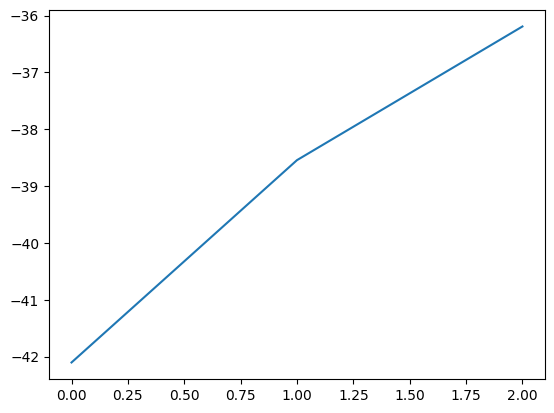

In [5]:
# TODO
plt.plot(log_prob_list)
plt.show()

    ANS : It goes up for every iterations

### T3. Using 2 mixtures, initialize your Gaussian with means (3,3) and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mixture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration.



In [6]:
num_mixture = 2
mixture_weight = np.array([1] * num_mixture, dtype=float)

mean_params = np.array([[3,3], [-3,-3]], dtype=float)
cov_params = np.array([np.eye(2)] * num_mixture, dtype=float)

# INSERT CODE HERE
gmm2 = GMM(mixture_weight, mean_params, cov_params)
log_prob_list2 = gmm2.perform_em_iterations(data, num_iterations)

Initialization
m :
 [1. 1.]
mu :
 [[ 3.  3.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
Iteration: 1
m :
 [0.66666666 0.33333334]
mu :
 [[ 4.50000001  4.66666667]
 [-3.99999997 -4.66666663]]
covariance matrix :
 [[[9.16666668 0.        ]
  [0.         8.66666669]]

 [[5.66666672 0.        ]
  [0.         5.66666677]]]
-------------------------------------------------------------
Iteration: 2
m :
 [0.66652866 0.33347134]
mu :
 [[ 4.49739004  4.66243446]
 [-3.9912655  -4.65434481]]
covariance matrix :
 [[[6.94971903 0.        ]
  [0.         5.94046426]]

 [[4.72011919 0.        ]
  [0.         2.98099996]]]
-------------------------------------------------------------
Iteration: 3
m :
 [0.66669218 0.33330782]
mu :
 [[ 4.49960686  4.66618544]
 [-3.99986439 -4.66641867]]
covariance matrix :
 [[[6.9196161  0.        ]
  [0.         5.89303254]]

 [[4.66851519 0.        ]
  [0.         2.89184297

### T4. Plot the log likelihood of the model given the data after each EM step. Compare the log likelihood between using two mixtures and three mixtures. Which one has the better likelihood?

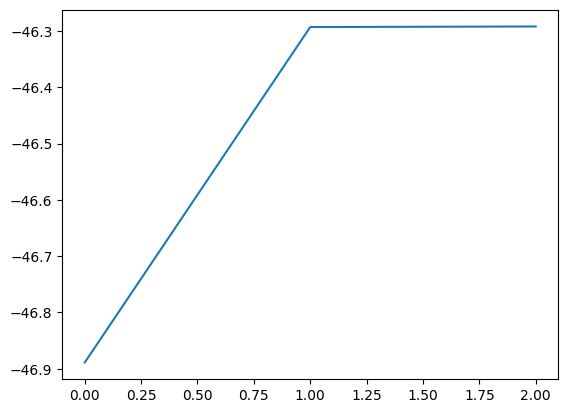

In [7]:
# TODO
plt.plot(log_prob_list2)
plt.show()

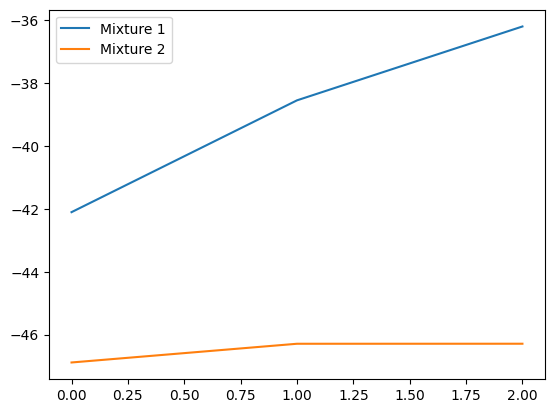

In [8]:
# TODO: Plot Comparision of log_likelihood from T1 and T3

plt.plot(log_prob_list, label="Mixture 1")
plt.plot(log_prob_list2, label="Mixture 2")
plt.legend()
plt.show()

    ANS : Mixture with three initial points has more likelihood than two initial points

# The face database

In [9]:
# Download facedata for google colab
!wget -nc https://github.com/ekapolc/Pattern_2024/raw/main/HW/HW03/facedata_mat.zip
!unzip -o facedata_mat.zip

--2024-02-20 18:01:49--  https://github.com/ekapolc/Pattern_2024/raw/main/HW/HW03/facedata_mat.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ekapolc/Pattern_2024/main/HW/HW03/facedata_mat.zip [following]
--2024-02-20 18:01:50--  https://raw.githubusercontent.com/ekapolc/Pattern_2024/main/HW/HW03/facedata_mat.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 953320 (931K) [application/zip]
Saving to: ‘facedata_mat.zip’

facedata_mat.zip    100%[===================>] 930.98K  --.-KB/s    in 0.06s   

2024-02-20 18:01:50 (15.0 MB/s) - ‘facedata_mat.zip’ saved [953320/953320]

Archive:  face

In [10]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import img_as_float

# Change path to your facedata.mat file.
facedata_path = 'facedata.mat'

data = scipy.io.loadmat(facedata_path)
data_size = data['facedata'].shape

%matplotlib inline
print(data_size, data['facedata'][0, 0].shape)

(40, 10) (56, 46)


### Preprocess xf

In [11]:
xf = np.zeros((data_size[0], data_size[1], data['facedata'][0,0].shape[0], data['facedata'][0,0].shape[1]))
for i in range(data['facedata'].shape[0]):
    for j in range(data['facedata'].shape[1]):
        xf[i,j] = img_as_float(data['facedata'][i,j])

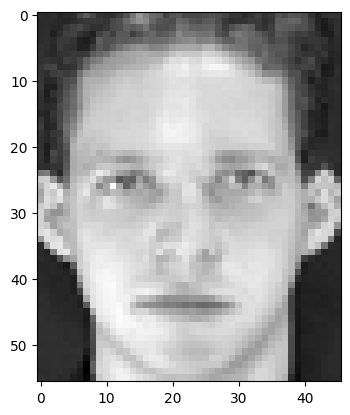

In [12]:
# Example: Ploting face image.
plt.imshow(xf[0,0], cmap = 'gray')
plt.show()

### T5. What is the Euclidean distance between xf[0,0] and xf[0,1]? What is the Euclidean distance between xf[0,0] and xf[1,0]? Does the numbers make sense? Do you think these numbers will be useful for face verification?

In [13]:
def L2_dist(x1, x2):
    diff = (x1 - x2)
    return np.sqrt(np.sum(diff * diff))

# Test L2_dist
def test_L2_dist():
    assert L2_dist(np.array([1, 2, 3]), np.array([1, 2, 3])) == 0.0
    assert L2_dist(np.array([0, 0, 0]), np.array([1, 2, 3])) == np.sqrt(14)
    assert L2_dist(np.array([4, 5, 6]), np.array([1, 2, 3])) == np.sqrt(27)

test_L2_dist()

print('Euclidean distance between xf[0,0] and xf[0,1] is', L2_dist(xf[0,0], xf[0,1]))
print('Euclidean distance between xf[0,0] and xf[1,0] is', L2_dist(xf[0,0], xf[1,0]))

Euclidean distance between xf[0,0] and xf[0,1] is 10.037616294165492
Euclidean distance between xf[0,0] and xf[1,0] is 8.173295099737281


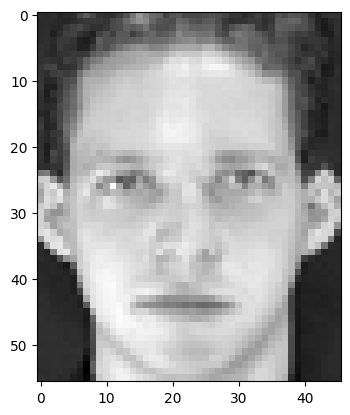

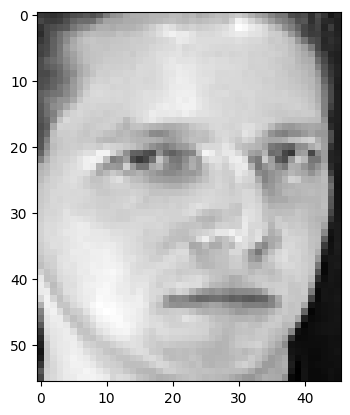

In [14]:
# TODO: Show why does the numbers make sense
plt.imshow(xf[0,0], cmap = 'gray')
plt.show()

plt.imshow(xf[0,1], cmap = 'gray')
plt.show()

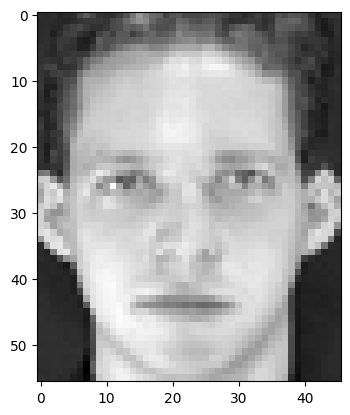

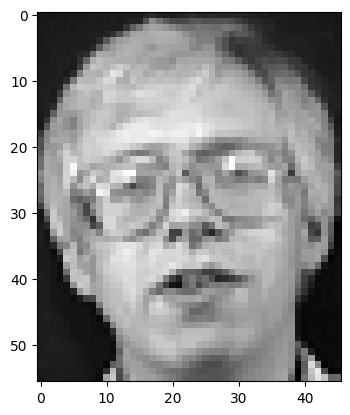

In [15]:
plt.imshow(xf[0,0], cmap = 'gray')
plt.show()

plt.imshow(xf[1,0], cmap = 'gray')
plt.show()

    ANS : Number from L2 distance makes sense because the face orientation is similar so the difference between two faces will not be different much even though it's different person.
    In this case L2 distance can be used to measure difference but there might occur false-positive case

### T6. Write a function that takes in a set of feature vectors T and a set of feature vectors D, and then output the similarity matrix A. Show the matrix as an image. Use the feature vectors from the first 3 images from all 40 people for list T (in order x[0, 0], x[0, 1], x[0, 2], x[1, 0], x[1, 1], ...x[39, 2]). Use the feature vectors from the remaining 7 images from all 40 people for list D (in order x[0, 3], x[0, 4], x[0, 5], x[1, 6], x[0, 7], x[0, 8], x[0, 9], x[1, 3], x[1, 4]...x[39, 9]). We will treat T as our training images and D as our testing images

In [16]:
def organize_shape(matrix):
    """
    TODO (Optional): Reduce matrix dimension of 2D image to 1D and merge people and image dimension.
    This function can be useful at organizing matrix shapes.

    Example:
        Input shape: (people_index, image_index, image_shape[0], image_shape[1])
        Output shape: (people_index*image_index, image_shape[0]*image_shape[1])
    """
    num_people = matrix.shape[0]
    num_image = matrix.shape[1]
    image_x = matrix.shape[2]
    image_y = matrix.shape[3]

    xf_flattened = np.zeros((num_people * num_image, image_x * image_y))

    for people_index in range(num_people):
      for image_index in range(num_image):
        xf_flattened[people_index * num_image + image_index] = matrix[people_index, image_index].flatten()

    return xf_flattened

def generate_similarity_matrix(A, B):
    """
    TODO: Calculate similarity matrix M,
    which M[i, j] is a distance between A[i] and B[j].
    """

    # INSERT CODE HERE
    similarity_matrix = np.zeros((A.shape[0], B.shape[0]))
    for i in range(A.shape[0]):
      for j in range(B.shape[0]):
        similarity_matrix[i, j] = L2_dist(A[i], B[j])

    return similarity_matrix

def test_generate_similarity_matrix():
    test_A = np.array([[1, 2], [3, 4]])
    test_B = np.array([[1, 2], [5, 6], [7, 8]])
    expected_matrix = np.sqrt(np.array([[0, 32, 72], [8, 8, 32]]))
    assert (generate_similarity_matrix(test_A, test_B) == expected_matrix).all()

test_generate_similarity_matrix()

In [17]:
#TODO: Show similariry matrix between T and D.
T = organize_shape(xf[:, :3])
D = organize_shape(xf[:, 3:])

# INSERT CODE HERE
similarity_matrix = generate_similarity_matrix(T, D)

### T7. From the example similarity matrix above, what does the black square between [5:10,5:10] suggest about the pictures from person number 2? What do the patterns from person number 1 say about the images from person 1?


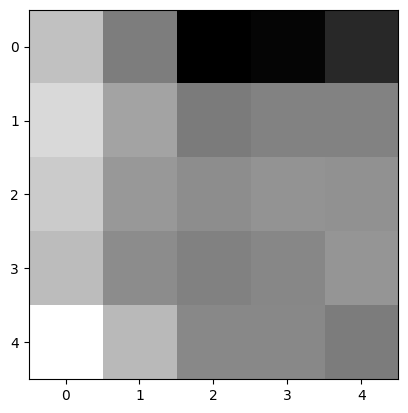

In [18]:
# INSERT CODE HERE
plt.imshow(similarity_matrix[5:10,5:10], cmap = 'gray')
plt.show()

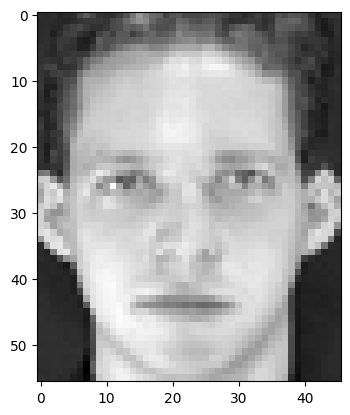

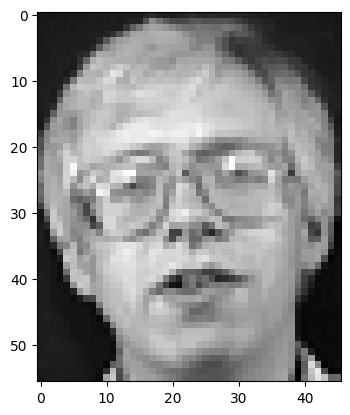

In [19]:
plt.imshow(xf[0,0], cmap = 'gray')
plt.show()

plt.imshow(xf[1,0], cmap = 'gray')
plt.show()


        ANS :

### T8. Write a function that takes in the similarity matrix created from the previous part, and a threshold t as inputs. The outputs of the function are the true positive rate and the false alarm rate of the face verification task (280 Test images, tested on 40 people, a total of 11200 testing per threshold). What is the true positive rate and the false alarm rate for t = 10?

In [20]:
def evaluate_performance(similarity_matrix, threshold):
    """
    TODO: Calculate true positive rate and false alarm rate from given similarity_matrix and threshold.
    """

    # INSERT CODE HERE
    feature_size = 3
    test_size = 7

    feature_length = similarity_matrix.shape[0]
    test_length = similarity_matrix.shape[1]

    true_size = 0

    true_pos = 0
    false_pos = 0

    false_size = 0

    true_neg = 0
    false_neg = 0

    for i in range(test_length):
      for j in range(40):
        test_person_idx = i // test_size

        is_similar_arr = similarity_matrix[j*feature_size: (j + 1)*feature_size, i] <= threshold
        is_similar = np.sum(is_similar_arr) > 0

        if test_person_idx == j:
          if is_similar:
            true_pos += 1
          else:
            false_neg += 1
          true_size += 1
        else:
          if is_similar:
            false_pos += 1
          else:
            true_neg += 1
          false_size += 1

    true_pos_rate = true_pos / true_size
    false_pos_rate = false_pos / false_size
    true_neg_rate = true_neg / false_size
    false_neg_rate = false_neg / true_size
    return true_pos_rate, false_neg_rate, true_neg_rate, false_pos_rate

# Quick check
# (true_pos_rate, false_pos_rate) should be (0.9928571428571429, 0.33507326007326005)
evaluate_performance(similarity_matrix, 9.5)

(0.9928571428571429,
 0.007142857142857143,
 0.6649267399267399,
 0.33507326007326005)

In [21]:
evaluate_performance(similarity_matrix, 10)

(0.9964285714285714,
 0.0035714285714285713,
 0.5435897435897435,
 0.4564102564102564)

        ANS: (0.9964285714285714, 0.4564102564102564)

### T9. Plot the RoC curve for this simple verification system. What should be the minimum threshold to generate the RoC curve? What should be the maximum threshold? Your RoC should be generated from at least 1000 threshold levels equally spaced between the minimum and the maximum. (You should write a function for this).

In [22]:
def calculate_roc(input_mat, threshold):
    """
    TODO: Calculate a list of true_pos_rate and a list of false_pos_rate from the given matrix.
    """

    # INSERT CODE HERE
    tpr_list = []
    far_list = []
    for t in threshold:
      tpr, fnr, tnr, fpr = evaluate_performance(input_mat, t)
      tpr_list.append(tpr)
      far_list.append(fpr)

    return tpr_list, far_list

def plot_roc(input_mat, threshold):
    """
    TODO: Plot RoC Curve from a given matrix.
    """
    # INSERT CODE HERE
    tpr_list, far_list = calculate_roc(input_mat, threshold)
    plt.plot(far_list, tpr_list)
    plt.show()

    return tpr_list, far_list

def find_threshold(input_mat):
    # INSERT CODE HERE
    mn = np.min(input_mat) - 0.1
    mx = np.max(input_mat) + 0.1

    step = (mx - mn) / 2000
    return np.arange(mn, mx, step), mn, mx

In [23]:
threshold, mn, mx = find_threshold(similarity_matrix)
print(mn, mx)

1.6420153428787783 17.64172616542469


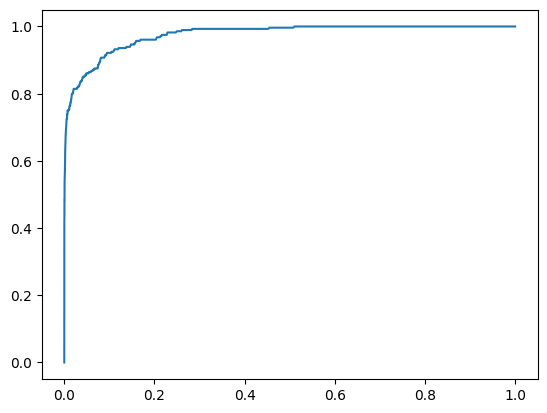

In [24]:
tpr_list, far_list = plot_roc(similarity_matrix, threshold)

    ANS: maximum threshold for generating ROC curve should be the maximum value from similarity matrix which is 17.64172616542469 (already add offset)
    and minimum should be 1.6420153428787783 (already add offset)

### T10. What is the EER (Equal Error Rate)? What is the recall rate at 0.1% false alarm rate? (Write this in the same function as the previous question)



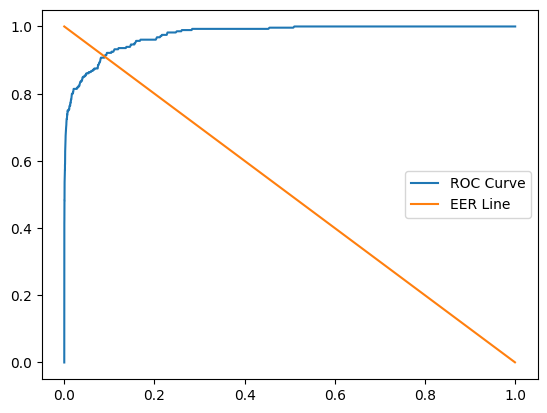

In [25]:
# You can add more parameter(s) to the function in the previous question.

# EER should be either 0.9071428571428571 or 0.9103759398496248 depending on method.
# Recall rate at 0.1% false alarm rate should be 0.5428571428571428.

x_line = np.arange(0, 1, 0.0005)
y_line = np.arange(1, 0, -0.0005)

plt.plot(far_list, tpr_list, label="ROC Curve")
plt.plot(x_line, y_line, label="EER Line")
plt.legend()
plt.show()

In [26]:
def find_eer_points(far_list, tpr_list):
  roc_zip = zip(far_list, tpr_list)

  mn = 1e6
  ans_x = -1
  ans_y = -1

  for (x, y) in roc_zip:
    if np.abs(1.0 - y - x) < mn:
      ans_x = x
      ans_y = y
      mn = np.abs(1.0 - y - x)

  return ans_x, ans_y

In [27]:
find_eer_points(far_list, tpr_list)

(0.08965201465201465, 0.9107142857142857)

In [28]:
def find_recall_rate(far_target, far_list, tpr_list):
  roc_zip = zip(far_list, tpr_list)

  mn = 1e6
  recall = 0.0

  for (x, y) in roc_zip:
    if np.abs(far_target - x) < mn:
      mn = np.abs(far_target - x)
      recall = y

  return recall

In [29]:
find_recall_rate(0.001, far_list, tpr_list)

0.5464285714285714

    ANS: EER rate is 0.9107142857142857 and recall is 0.5464285714285714

### T11. Compute the mean vector from the training images. Show the vector as an image (use numpy.reshape()). This is typically called the meanface (or meanvoice for speech signals). You answer should look exactly like the image shown below.

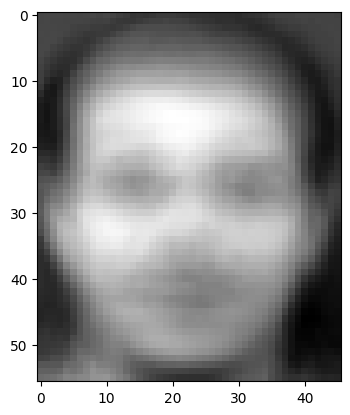

In [30]:
# INSERT CODE HERE
meanface = np.mean(T, axis=0)

plt.imshow(meanface.reshape((56, 46)), cmap = 'gray')
plt.show()

### T12. What is the size of the covariance matrix? What is the rank of the covariance matrix?


In [31]:
# TODO: Find the size and the rank of the covariance matrix.
from numpy.linalg import matrix_rank

In [32]:
cov_size = T.shape[1]
sample_size = T.shape[0]

cov = np.cov((T - meanface).T)

print(f"Covariance matrix size: ({cov.shape[0]}, {cov.shape[1]})")
print(f"Rank of covariance matrix: {matrix_rank(cov)}")

Covariance matrix size: (2576, 2576)
Rank of covariance matrix: 119


    ANS:
    - Covariance matrix size: (2576, 2576)
    - Rank of covariance matrix: 119


### T13. What is the size of the Gram matrix? What is the rank of Gram matrix? If we compute the eigenvalues from the Gram matrix, how many non- zero eigenvalues do we expect to get?

In [33]:
# TODO: Compute gram matrix.
X_bar = (T - meanface).T
gram_matrix = np.matmul(X_bar.T, X_bar)

In [34]:
from numpy.linalg import matrix_rank

In [35]:
# TODO: Show size and rank of Gram matrix.
gram_matrix.shape, matrix_rank(gram_matrix)

((120, 120), 119)

    ANS: (120, 120), 119


## T14. Is the Gram matrix also symmetric? Why?


In [36]:
np.all(gram_matrix.T == gram_matrix)

True

```
Because X^TX = (X^TX)^T^T = (X^TX)^T
```

### T15. Compute the eigenvectors and eigenvalues of the Gram matrix, v 0 and λ. Sort the eigenvalues and eigenvectors in descending order so that the first eigenvalue is the highest, and the first eigenvector corresponds to the best direction. How many non-zero eigenvalues are there? If you see a very small value, it is just numerical error and should be treated as zero.




In [37]:
from numpy.linalg import eigh

In [38]:
# Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html

def calculate_eigenvectors_and_eigenvalues(matrix):
    """
    TODO: Calculate eigenvectors and eigenvalues,
    then sort the eigenvalues and eigenvectors in descending order.

    Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
    """

    # INSERT CODE HERE
    eigenvalues, eigenvectors = eigh(matrix)
    sort_index = np.argsort(-eigenvalues)

    sorted_eigenvectors = eigenvectors[:,sort_index]
    sorted_eigenvalues = eigenvalues[sort_index]
    sorted_eigenvalues[sorted_eigenvalues <= 1e-6] = 0.0

    return sorted_eigenvalues, sorted_eigenvectors

eigenvalues, eigenvectors = calculate_eigenvectors_and_eigenvalues(gram_matrix)

def test_eigenvalues_eigenvectors():
    # Dot product of an eigenvector pair should equal to zero.
    assert np.round(eigenvectors[10].dot(eigenvectors[20]), 10) == 0.0

    # Check if eigenvalues are sorted.
    assert list(eigenvalues) == sorted(eigenvalues, reverse = True)

test_eigenvalues_eigenvectors()

In [39]:
np.sum(eigenvalues > 0)

119

    ANS: 119

### T16. Plot the eigenvalues. Observe how fast the eigenvalues decrease. In class, we learned that the eigenvalues is the size of the variance for each eigenvector direction. If I want to keep 95% of the variance in the data, how many eigenvectors should I use?



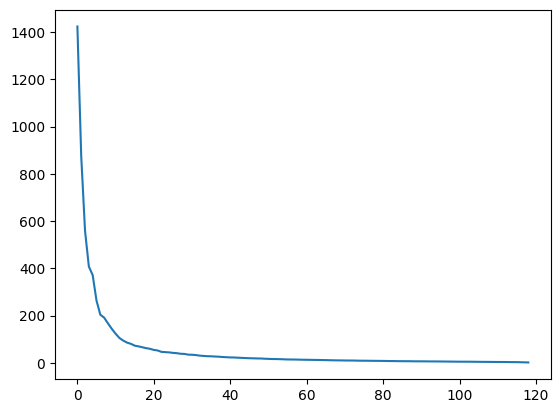

In [40]:
# INSERT CODE HERE
plt.plot(eigenvalues[:119])
plt.show()

In [41]:
total_sum = np.sum(eigenvalues)
cumulative_sum = np.cumsum(eigenvalues)

variance_threshold = 0.95
retained_eigenvalues = np.argmax(cumulative_sum >= total_sum * 0.95) + 1
retained_eigenvalues

64

    ANS: 64

### T17. Compute $\vec{v}$ . Don’t forget to renormalize so that the norm of each vector is 1 (you can use numpy.linalg.norm). Show the first 10 eigenvectors as images. Two example eigenvectors are shown below. We call these images eigenfaces (or eigenvoice for speech signals).

In [42]:
from numpy.linalg import norm

In [43]:
# TODO: Compute v, then renormalize it.

# INSERT CODE HERE

v = np.matmul(X_bar, eigenvectors)
print(v.shape)
for i in range(v.shape[1]):
  v[:,i] = v[:,i] / norm(v[:,i])


(2576, 120)


In [44]:
def test_eignevector_cov_norm(v):
    assert (np.round(np.linalg.norm(v, axis=0), 1) == 1.0).all()

test_eignevector_cov_norm(v)

Image 1


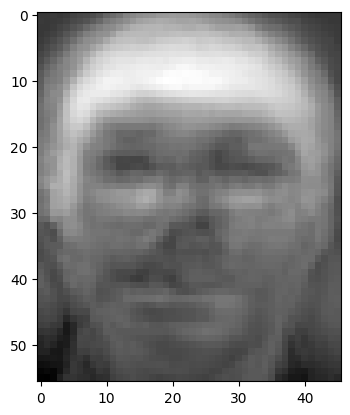

Image 2


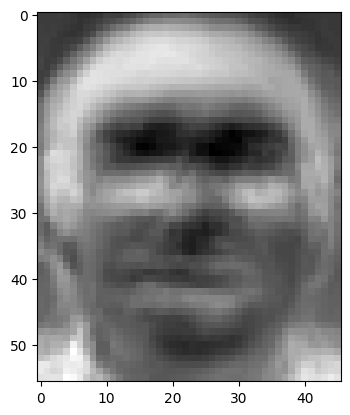

Image 3


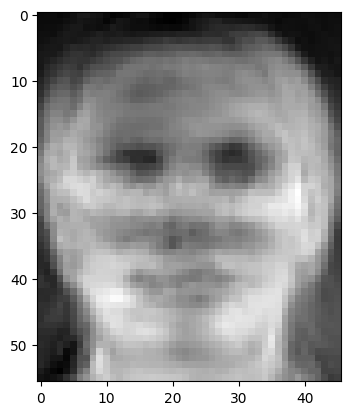

Image 4


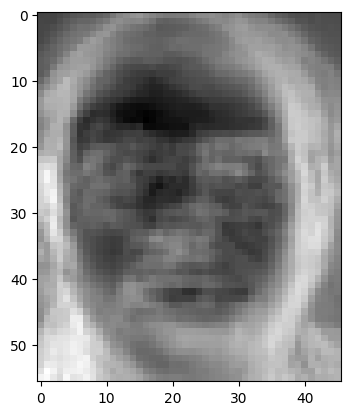

Image 5


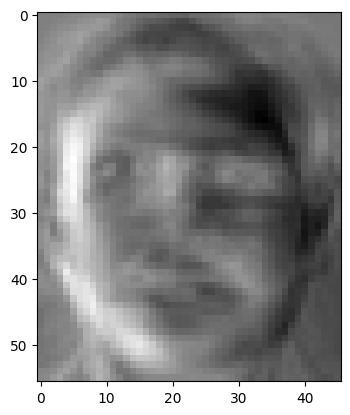

Image 6


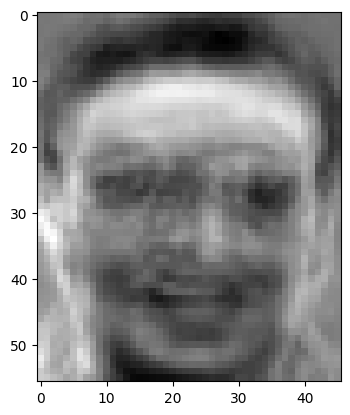

Image 7


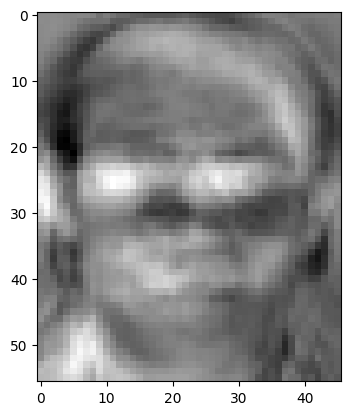

Image 8


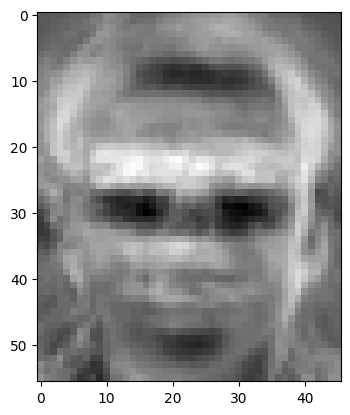

Image 9


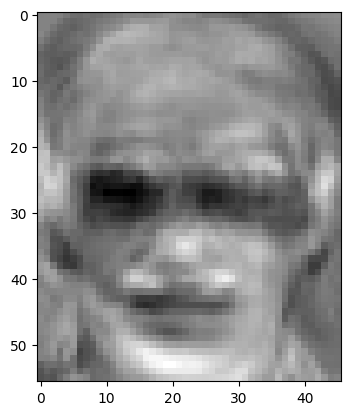

Image 10


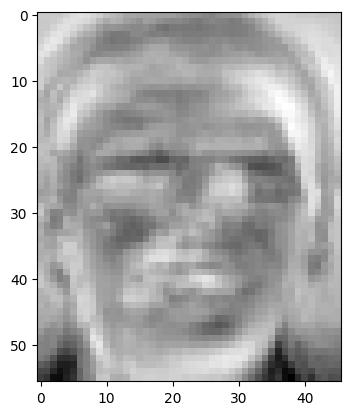

In [45]:
# TODO: Show the first 10 eigenvectors as images.
for i in range(10):
  print(f'Image {i + 1}')
  plt.imshow(v[:,i].reshape((56, 46)), cmap = 'gray')
  plt.show()

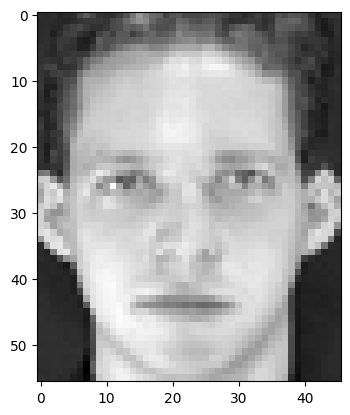

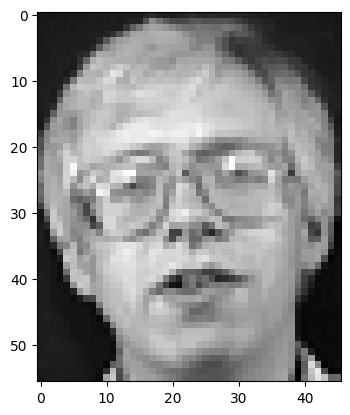

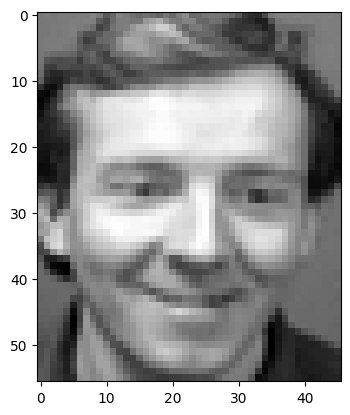

In [46]:
plt.imshow(xf[0,0], cmap='gray')
plt.show()
plt.imshow(xf[1,0], cmap='gray')
plt.show()
plt.imshow(xf[2,0], cmap='gray')
plt.show()


### T18. From the image, what do you think the first eigenvector captures? What about the second eigenvector? Look at the original images, do you think biggest variance are capture in these two eigenvectors?

    ANS: The first eigenvalue we will see that result has highlighted around hair and head which is the feature that easily extract by first eigenvalues

    Meanwhile, the second eigenvalue highlight around the eyes which tell us that second eigenvalue tends to extract feature which around the eyes

    When analyze the original image, we will see that hair and head quite be the one which have variation depends on person

### T19. Find the projection values of all images. Keep the first k = 10 projection values. Repeat the simple face verification system we did earlier using these projected values. What is the EER and the recall rate at 0.1% FAR?

In [47]:
def calculate_projection_vectors(matrix, meanface, v):
    print(matrix.shape, meanface.shape, v.shape)
    """
    TODO: Find the projection vectors on v from given matrix and meanface.
    """

    # INSERT CODE HERE
    projection_vectors = np.matmul(matrix.T, (v - meanface).T)

    return projection_vectors

In [48]:
def dimension_reduction(k, T, D, meanface, eigenvectors):
  T_reduced = calculate_projection_vectors(eigenvectors, meanface, T)[:, :k]
  D_reduced = calculate_projection_vectors(eigenvectors, meanface, D)[:, :k]

  return T_reduced, D_reduced

In [49]:
# TODO: Get projection vectors of T and D, then Keep first k projection values.
k = 80
T_reduced, D_reduced = dimension_reduction(k, T, D, meanface, np.matmul(X_bar, eigenvectors))

def test_reduce_dimension():
    assert T_reduced.shape[-1] == k
    assert D_reduced.shape[-1] == k

test_reduce_dimension()

(2576, 120) (2576,) (120, 2576)
(2576, 120) (2576,) (280, 2576)


In [50]:
# TODO: Get similarity matrix of T_reduced and D_reduced
similarity_matrix_reduced = generate_similarity_matrix(T_reduced, D_reduced)

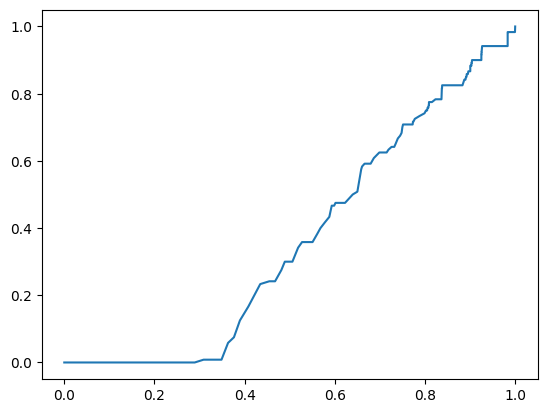

In [51]:
# TODO: Find EER and the recall rate at 0.1% FAR.
threshold, mn, mx = find_threshold(similarity_matrix_reduced)
tpr_list, far_list = plot_roc(similarity_matrix_reduced, threshold)

In [52]:
find_eer_points(far_list, tpr_list)

(0.5777777777777777, 0.4166666666666667)

In [53]:
find_recall_rate(0.001, far_list, tpr_list)

0.0

    ANS:

### T20. What is the k that gives the best EER? Try k = 5, 6, 7, 8, 9, 10, 11, 12, 13, 14.


(2576, 120) (2576,) (120, 2576)
(2576, 120) (2576,) (280, 2576)


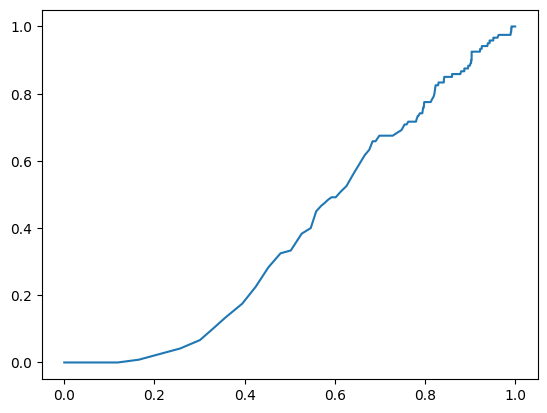

k = 5 -> (0.5587606837606838, 0.45)
(2576, 120) (2576,) (120, 2576)
(2576, 120) (2576,) (280, 2576)


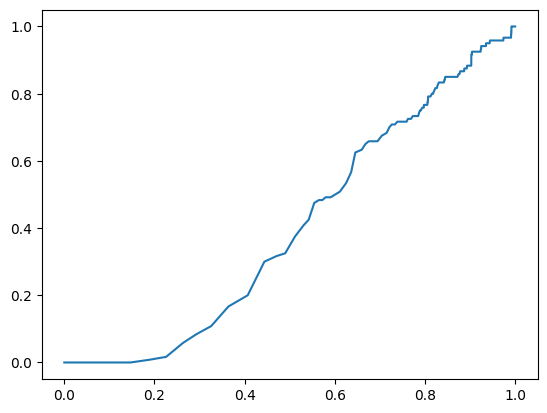

k = 6 -> (0.5544871794871795, 0.475)
(2576, 120) (2576,) (120, 2576)
(2576, 120) (2576,) (280, 2576)


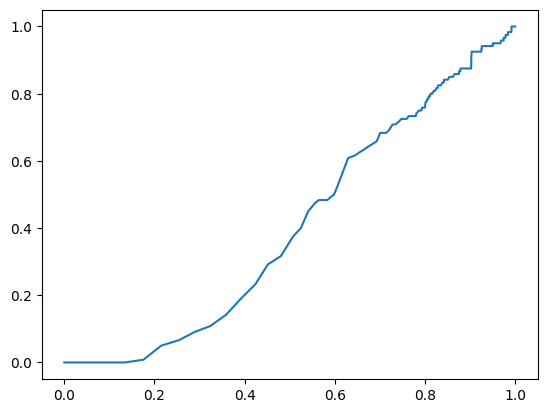

k = 7 -> (0.541025641025641, 0.45)
(2576, 120) (2576,) (120, 2576)
(2576, 120) (2576,) (280, 2576)


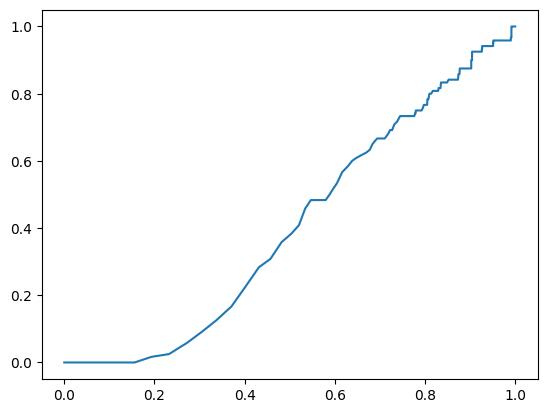

k = 8 -> (0.5344017094017094, 0.4583333333333333)
(2576, 120) (2576,) (120, 2576)
(2576, 120) (2576,) (280, 2576)


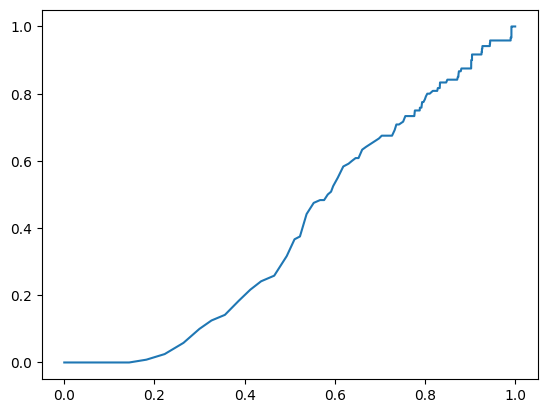

k = 9 -> (0.5373931623931624, 0.44166666666666665)
(2576, 120) (2576,) (120, 2576)
(2576, 120) (2576,) (280, 2576)


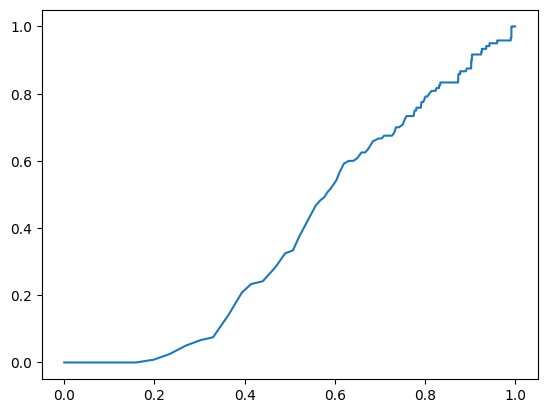

k = 10 -> (0.5574786324786325, 0.4666666666666667)
(2576, 120) (2576,) (120, 2576)
(2576, 120) (2576,) (280, 2576)


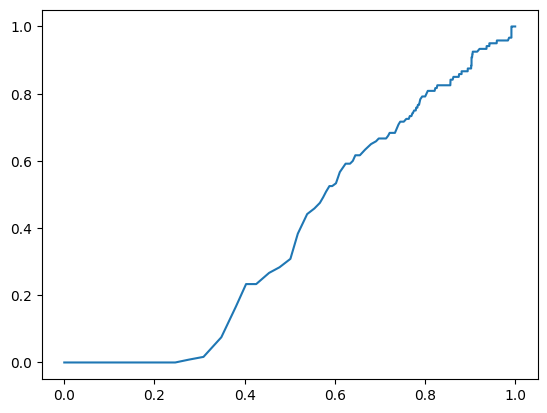

k = 11 -> (0.5547008547008547, 0.4583333333333333)
(2576, 120) (2576,) (120, 2576)
(2576, 120) (2576,) (280, 2576)


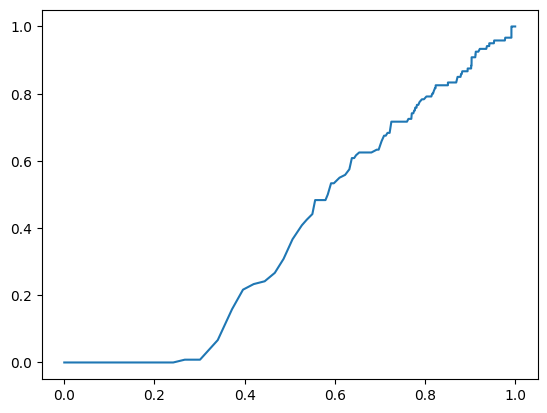

k = 12 -> (0.5502136752136753, 0.44166666666666665)
(2576, 120) (2576,) (120, 2576)
(2576, 120) (2576,) (280, 2576)


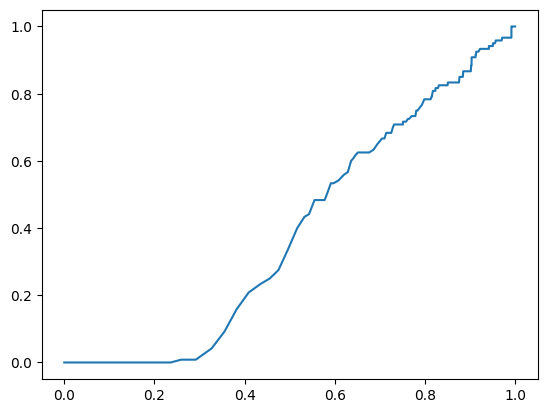

k = 13 -> (0.5429487179487179, 0.44166666666666665)
(2576, 120) (2576,) (120, 2576)
(2576, 120) (2576,) (280, 2576)


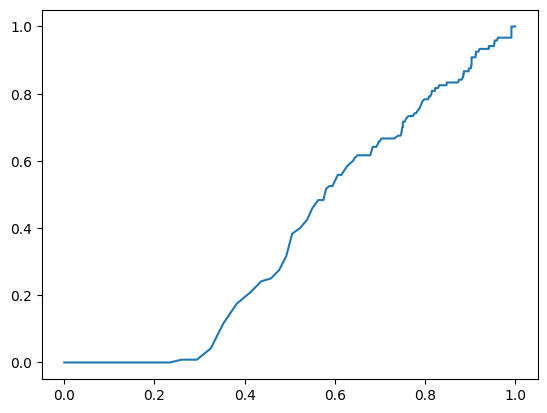

k = 14 -> (0.5497863247863248, 0.4583333333333333)


In [54]:
# INSERT CODE HERE
for k in range(5, 15):
  T_reduced, D_reduced = dimension_reduction(k, T, D, meanface, np.matmul(X_bar, eigenvectors))

  similarity_matrix_reduced = generate_similarity_matrix(T_reduced, D_reduced)

  threshold, mn, mx = find_threshold(similarity_matrix_reduced)

  tpr_list, far_list = plot_roc(similarity_matrix_reduced, threshold)

  eer_point = find_eer_points(far_list, tpr_list)
  print(f'k = {k} -> {eer_point}')

    ANS:

### T21. In order to assure that $S_W$ is invertible we need to make sure that $S_W$ is full rank. How many PCA dimensions do we need to keep in order for $S_W$ to be full rank? (Hint: How many dimensions does $S_W$ have? In order to be of full rank, you need to have the same number of linearly independent factors)

    ANS: If we consider training set so there are 120 samples with 40 classes so dimension of S_W will be 120 - 40 = 80

In [55]:
# TODO: Define dimension of PCA.
n_dim = 80

# TODO: Find PCA of T and D with n_dim dimension.
T_reduced, D_reduced = dimension_reduction(n_dim, T, D, meanface, np.matmul(X_bar, eigenvectors))

(2576, 120) (2576,) (120, 2576)
(2576, 120) (2576,) (280, 2576)


### T22. Using the answer to the previous question, project the original in- put to the PCA subspace. Find the LDA projections. To find the inverse, use −1 numpy.linalg.inv. Is $S_W$ $S_B$ symmetric? Can we still use numpy.linalg.eigh? How many non-zero eigenvalues are there?


In [56]:
# TODO: Find the LDA projection.
def calculate_SB(matrix, image_size, class_size):
  new_reshape = matrix.reshape((class_size, image_size, matrix.shape[1]))
  in_class_mean = new_reshape.mean(axis=1)

  all_class_mean = matrix.mean(axis=0)

  s_b = np.zeros((new_reshape.shape[2], new_reshape.shape[2]))

  for i in range(in_class_mean.shape[0]):
    diff = in_class_mean[i] - all_class_mean
    s_b += np.outer(diff, diff)

  return s_b

def calculate_SW(matrix, image_size, class_size):
  new_reshape = matrix.reshape((class_size, image_size, matrix.shape[1]))
  in_class_mean = new_reshape.mean(axis=1)

  s_w = np.zeros((new_reshape.shape[2], new_reshape.shape[2]))
  for i in range(class_size):
    for j in range(image_size):
      diff = matrix[j] - in_class_mean[i]
      s_w += np.outer(diff, diff)

  return s_w

selected_T = T[:, :n_dim]
s_b = calculate_SB(selected_T, 40, 3)
s_w = calculate_SW(selected_T, 40, 3)

lda = np.matmul(np.linalg.inv(s_w), s_b)

In [57]:
# TODO: Find how many non-zero eigenvalues there are.
lda_eigenvalues, lda_eigenvectors = calculate_eigenvectors_and_eigenvalues(lda)
lda_eigenvalues

array([1.61202513e+00, 8.41215046e-01, 6.54100835e-01, 4.19295172e-01,
       3.21375909e-01, 2.51627493e-01, 2.04271763e-01, 1.94654244e-01,
       1.60907031e-01, 1.29773332e-01, 1.11501726e-01, 1.01564907e-01,
       8.49482839e-02, 7.82204202e-02, 7.66557726e-02, 6.46632568e-02,
       5.82853808e-02, 5.70261564e-02, 5.17577268e-02, 4.88306131e-02,
       4.63985642e-02, 4.04347671e-02, 3.76465167e-02, 3.49241013e-02,
       3.25225845e-02, 2.91438832e-02, 2.54704407e-02, 1.86825467e-02,
       1.73958576e-02, 1.38633493e-02, 1.32933702e-02, 1.23222731e-02,
       9.24814250e-03, 8.89686060e-03, 7.77166914e-03, 6.12722248e-03,
       3.28835647e-03, 2.04882504e-03, 1.74840345e-03, 6.38990246e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [58]:
np.sum(eigenvalues > 0)

119

    ANS: 40

### T23. Plot the first 10 LDA eigenvectors as images (the 10 best projections). Note that in this setup, you need to convert back to the original image space by using the PCA projection. The LDA eigenvectors can be considered as a linear combination of eigenfaces. Compare the LDA projections with the PCA projections.

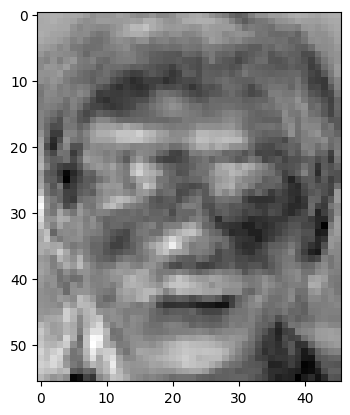

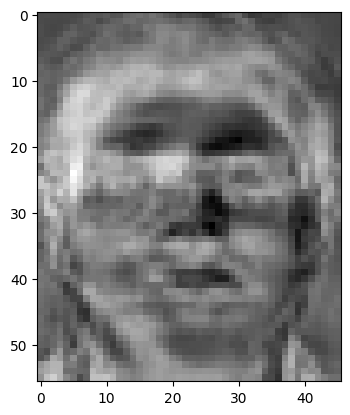

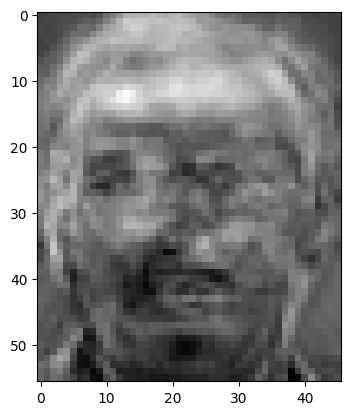

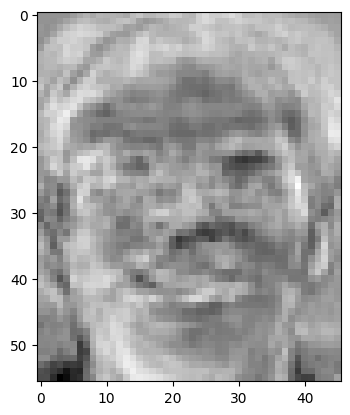

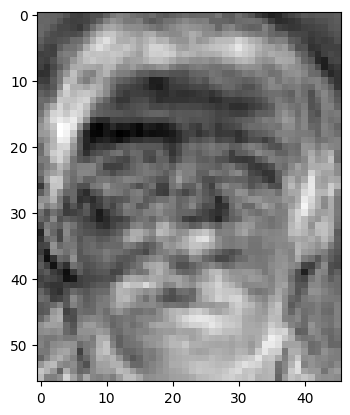

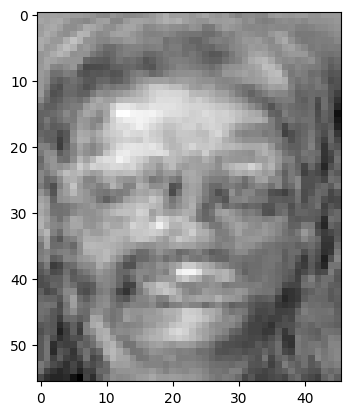

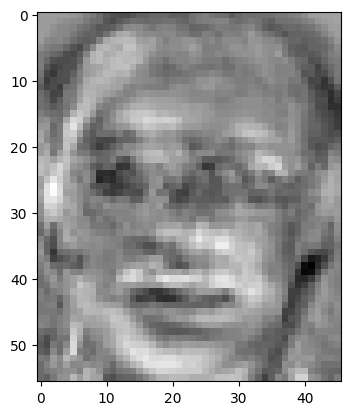

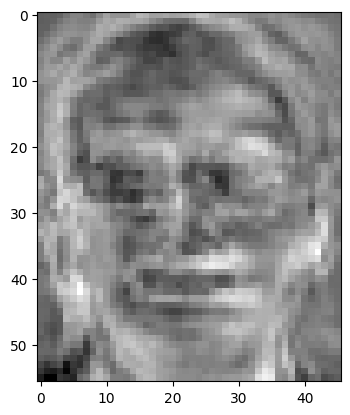

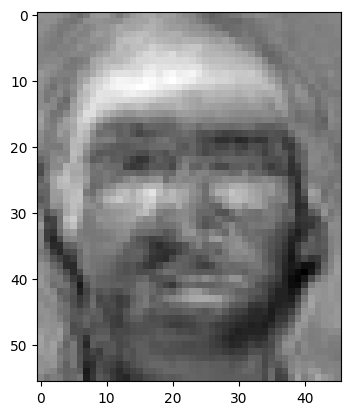

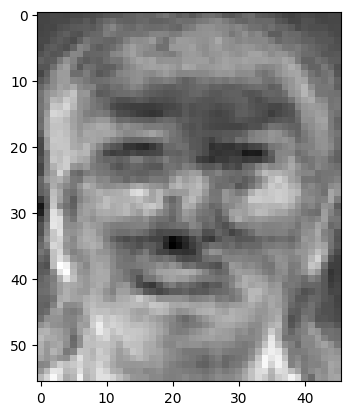

In [59]:
# INSERT CODE HERE
for i in range(10):
  v = np.matmul(X_bar, eigenvectors[i])
  plt.imshow(v.reshape((56, 46)), cmap="gray")
  plt.show()

### T24. The combined PCA+LDA projection procedure is called fisherface. Calculate the fisherfaces projection of all images. Do the simple face verification experiment using fisherfaces. What is the EER and recall rate at 0.1% FAR?

In [60]:
# INSERT CODE HERE

    ANS:

### T25.Plot the RoC of all three experiments (No projection, PCA, andFisher) on the same axes. Compare and contrast the three results. Submit yourwriteup and code on MyCourseVille.

In [61]:
# INSERT CODE HERE

    ANS: